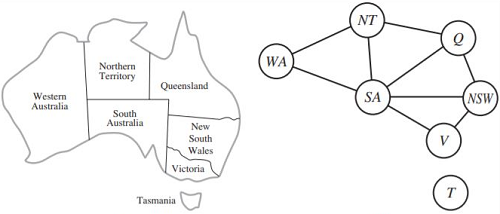

In [6]:
# Define a new cgraph
cgraph = {'WA': ['SA', 'NT'],
          'Q': ['SA', 'NT', 'NSW'],
          'T': [],
          'V': ['SA', 'NSW'],
          'SA': ['WA', 'NT', 'Q', 'NSW','V'],
          'NT': ['Q', 'WA', 'SA'],
          'NSW': ['Q', 'V', 'SA']}

remainingValues = {'WA': ['R','G','B'],
                    'Q': ['R','G','B'],
                    'T': ['R','G','B'],
                    'V':  ['R','G','B'],
                    'NT': ['R','G','B'],
                    'SA': ['R','G','B'],
                    'NSW': ['R','G','B']}

In [7]:
import random

def get_color(node, rv, cg):
    if node not in rv or not rv[node]:
        return None  # no colors left to assign

    color = random.choice(rv[node])
    rv.pop(node)  # remove the node from domain after assignment

    # Forward checking: update neighbor domains
    for neighbor in cg[node]:
        if neighbor in rv and color in rv[neighbor]:
            rv[neighbor].remove(color)
            if not rv[neighbor]:  # domain wipeout
                return None
    return color


## 1) Highest Degree Node

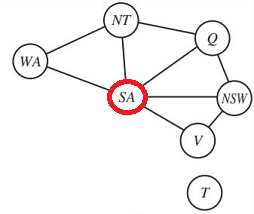

In [17]:
def get_hdnode(cg, solved={}):
    maxDegreeNode = None
    degree = -1
    for node, neighbors in cg.items():
        if node not in solved and len(neighbors) > degree:
            degree = len(neighbors)
            maxDegreeNode = node
    return maxDegreeNode

get_hdnode(cgraph,{})

'SA'

Color the nodes using Highest degree heuristic

In [18]:
assigned = {}

remainingValues = {
    'WA': ['R','G','B'],
    'Q': ['R','G','B'],
    'T': ['R','G','B'],
    'V':  ['R','G','B'],
    'NT': ['R','G','B'],
    'SA': ['R','G','B'],
    'NSW': ['R','G','B']
}

for _ in range(len(cgraph)):
    print("Remaining Values:", remainingValues)

    selectedNode = get_hdnode(remainingValues)
    print("Selected Node:", selectedNode)

    color = get_color(selectedNode, remainingValues, cgraph)

    # CODE
    # check if 'None' is returned
    # print failure and break

    assigned[selectedNode] = color
    print("Assigned Colors:", assigned)

print("\nFinal Assignment:" if len(assigned) == len(cgraph) else "\n Partial Assignment (Failure):")
print(assigned)

Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: WA
Assigned Colors: {'WA': 'B'}
Remaining Values: {'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G'], 'SA': ['R', 'G'], 'NSW': ['R', 'G', 'B']}
Selected Node: Q
Assigned Colors: {'WA': 'B', 'Q': 'G'}
Remaining Values: {'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R'], 'SA': ['R'], 'NSW': ['R', 'B']}
Selected Node: T
Assigned Colors: {'WA': 'B', 'Q': 'G', 'T': 'R'}
Remaining Values: {'V': ['R', 'G', 'B'], 'NT': ['R'], 'SA': ['R'], 'NSW': ['R', 'B']}
Selected Node: V
Assigned Colors: {'WA': 'B', 'Q': 'G', 'T': 'R', 'V': 'B'}
Remaining Values: {'NT': ['R'], 'SA': ['R'], 'NSW': ['R']}
Selected Node: NT
Assigned Colors: {'WA': 'B', 'Q': 'G', 'T': 'R', 'V': 'B', 'NT': None}
Remaining Values: {'SA': [], 'NSW': ['R']}
Selected Node: NSW
Assigned Colors: {'WA': 'B',

In [19]:
remainingValues.keys()

dict_keys(['SA'])

## 2) Minimum Remaining Value

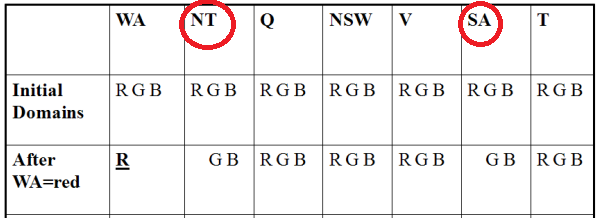

In [25]:
# MRV Heuristic
def get_MRVnode(rv):
    min_node = None
    min_values = float('inf')

    for node in rv:
        if node not in assigned:  # 'assigned' is global here
            if len(rv[node]) < min_values:
                min_values = len(rv[node])
                min_node = node

    return min_node


# Select a valid color for a node
def get_color(node, rv, graph):
    for color in rv[node]:
        conflict = False
        for neighbor in graph[node]:
            if neighbor in assigned and assigned[neighbor] == color:
                conflict = True
                break
        if not conflict:
            return color
    return None


# Graph definition (your updated cgraph)
cgraph = {
    'WA': ['SA', 'NT'],
    'Q': ['SA', 'NT', 'NSW'],
    'T': [],
    'V': ['SA', 'NSW'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'NT': ['Q', 'WA', 'SA'],
    'NSW': ['Q', 'V', 'SA']
}


Color the nodes using MRV heuristic

In [38]:
assigned = {}

remainingValues = {
    'WA': ['R','G','B'],
    'Q': ['R','G','B'],
    'T': ['R','G','B'],
    'V':  ['R','G','B'],
    'NT': ['R','G','B'],
    'SA': ['R','G','B'],
    'NSW': ['R','G','B']
}

for _ in range(len(cgraph)):
    print("Remaining Values:", remainingValues)

    selectedNode = get_MRVnode(remainingValues)
    print("Selected Node:", selectedNode)

    color = get_color(selectedNode, remainingValues, cgraph)

    # CODE
    # check if 'None' is returned
    # print failure and break

    assigned[selectedNode] = color
    print("Assigned Colors:", assigned)

print("\nFinal Assignment:" if len(assigned) == len(cgraph) else "\n Partial Assignment (Failure):")
print(assigned)


Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: WA
Assigned Colors: {'WA': 'R'}
Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: Q
Assigned Colors: {'WA': 'R', 'Q': 'R'}
Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: T
Assigned Colors: {'WA': 'R', 'Q': 'R', 'T': 'R'}
Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: V
Assigned Colors: {'WA': 'R', 'Q': 'R', 'T': 'R', 'V': 'R'}
Remaining Values: {'WA': ['R', 'G', 'B'], '

**3) Select node randomly**

In [48]:
def get_RandomNode(rv):
    if not rv:
        return None
    return random.choice(list(rv.keys()))

In [49]:
assigned = {}

remainingValues = {
    'WA': ['R','G','B'],
    'Q': ['R','G','B'],
    'T': ['R','G','B'],
    'V':  ['R','G','B'],
    'NT': ['R','G','B'],
    'SA': ['R','G','B'],
    'NSW': ['R','G','B']
}

for _ in range(len(cgraph)):
    print("Remaining Values:", remainingValues)

    selectedNode = get_RandomNode(remainingValues)
    print("Selected Node:", selectedNode)

    color = get_color(selectedNode, remainingValues, cgraph)

    # CODE
    # check if 'None' is returned
    # print failure and break

    assigned[selectedNode] = color
    print("Assigned Colors:", assigned)

print("\nFinal Assignment:" if len(assigned) == len(cgraph) else "\n Partial Assignment (Failure):")
print(assigned)


Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: WA
Assigned Colors: {'WA': 'R'}
Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: NSW
Assigned Colors: {'WA': 'R', 'NSW': 'R'}
Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: NT
Assigned Colors: {'WA': 'R', 'NSW': 'R', 'NT': 'G'}
Remaining Values: {'WA': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'T': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'SA': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B']}
Selected Node: Q
Assigned Colors: {'WA': 'R', 'NSW': 'R', 'NT': 'G', 'Q': 'B'}
Remaining Values: {'WA': ['R', '

# **Show the assigned color on map**

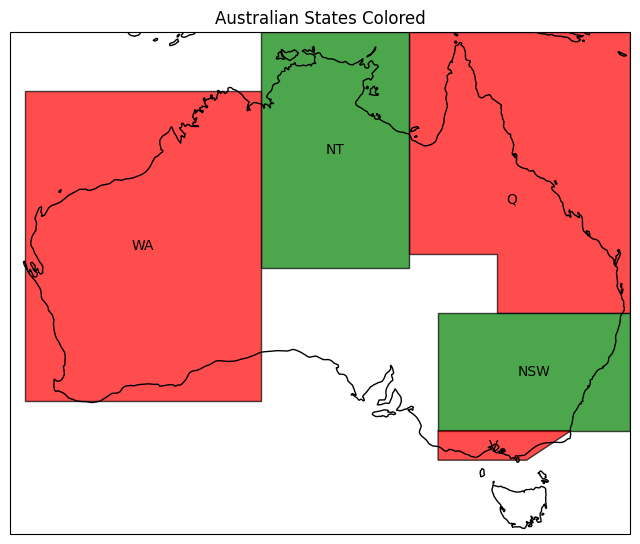

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#assigned = {'SA': 'R', 'NT': 'R', 'NSW': 'G', 'Q': 'B', 'T': 'R', 'V': 'B', 'WA': 'G'}
color_map = {'R': 'red', 'G': 'green', 'B': 'blue'}

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent((112, 154, -44, -10), crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Australian States Colored')

# Define the coordinates for each state (approximate)
state_coords = {
    'WA': [(113, -14), (129, -14), (129, -35), (113, -35)],
    'NT': [(129, -10), (139, -10), (139, -26), (129, -26)],
    'SA': [(130, -26), (141, -26), (141, -38), (130, -38)],
    'Q': [(139, -10), (154, -10), (154, -29), (145, -29), (145, -25), (139, -25)],
    'NSW': [(141, -29), (154, -29), (154, -37), (141, -37)],
    'V': [(141, -37), (150, -37), (147, -39), (141, -39)],
    'T': [(144, -39), (148, -44), (150, -43), (146, -39)]
}

for state, color_code in assigned.items():
    if state in state_coords:
        coords = state_coords[state]
        color = color_map.get(color_code, 'gray')  # Default to gray if color code is not found
        polygon = Polygon(coords, closed=True, facecolor=color, edgecolor='black', alpha=0.7)
        ax.add_patch(polygon)
        # Add state abbreviations as labels (optional)
        centroid_x = sum(p[0] for p in coords) / len(coords)
        centroid_y = sum(p[1] for p in coords) / len(coords)
        ax.text(centroid_x, centroid_y, state, ha='center', va='center', fontsize=10)

plt.show()

In [30]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 57.3 MB/s eta 0:00:00


**Exercise**

Insert a new map here and show simulation using highest degree heuristic.

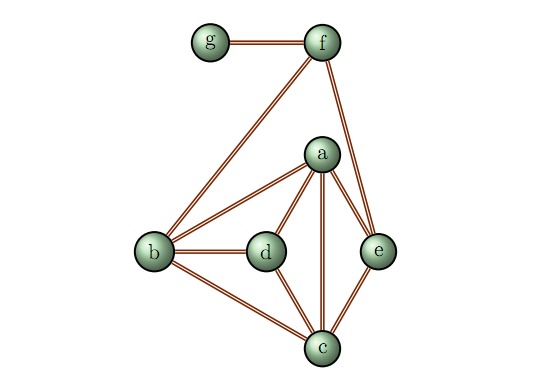

In [52]:
# Define a new cgraph
cgraph = {'A': ['B', 'D', 'E', 'C'],
          'B': ['F', 'A', 'D', 'C'],
          'C': ['B', 'D', 'A', 'E'],
          'D': ['B', 'A', 'C'],
          'E': ['A', 'C', 'F'],
          'F': ['B', 'E'],
          'G': ['F']}

remainingValues = {'A': ['R','G','B'],
                    'B': ['R','G','B'],
                    'C': ['R','G','B'],
                    'D':  ['R','G','B'],
                    'E': ['R','G','B'],
                    'F': ['R','G','B'],
                    'G': ['R','G','B']}

In [53]:
import random

def get_color(node, rv, cg):
    if node not in rv or not rv[node]:
        return None  # no colors left to assign

    color = random.choice(rv[node])
    rv.pop(node)  # remove the node from domain after assignment

    # Forward checking: update neighbor domains
    for neighbor in cg[node]:
        if neighbor in rv and color in rv[neighbor]:
            rv[neighbor].remove(color)
            if not rv[neighbor]:  # domain wipeout
                return None
    return color

In [54]:
def get_hdnode(cg, solved={}):
    maxDegreeNode = None
    degree = -1
    for node, neighbors in cg.items():
        if node not in solved and len(neighbors) > degree:
            degree = len(neighbors)
            maxDegreeNode = node
    return maxDegreeNode

get_hdnode(cgraph,{})

'A'

In [55]:
assigned = {}

remainingValues = {'A': ['R','G','B'],
                    'B': ['R','G','B'],
                    'C': ['R','G','B'],
                    'D':  ['R','G','B'],
                    'E': ['R','G','B'],
                    'F': ['R','G','B'],
                    'G': ['R','G','B']}

for _ in range(len(cgraph)):
    print("Remaining Values:", remainingValues)

    selectedNode = get_hdnode(remainingValues)
    print("Selected Node:", selectedNode)

    color = get_color(selectedNode, remainingValues, cgraph)

    # CODE
    # check if 'None' is returned
    # print failure and break

    assigned[selectedNode] = color
    print("Assigned Colors:", assigned)

print("\nFinal Assignment:" if len(assigned) == len(cgraph) else "\n Partial Assignment (Failure):")
print(assigned)

Remaining Values: {'A': ['R', 'G', 'B'], 'B': ['R', 'G', 'B'], 'C': ['R', 'G', 'B'], 'D': ['R', 'G', 'B'], 'E': ['R', 'G', 'B'], 'F': ['R', 'G', 'B'], 'G': ['R', 'G', 'B']}
Selected Node: A
Assigned Colors: {'A': 'G'}
Remaining Values: {'B': ['R', 'B'], 'C': ['R', 'B'], 'D': ['R', 'B'], 'E': ['R', 'B'], 'F': ['R', 'G', 'B'], 'G': ['R', 'G', 'B']}
Selected Node: F
Assigned Colors: {'A': 'G', 'F': 'R'}
Remaining Values: {'B': ['B'], 'C': ['R', 'B'], 'D': ['R', 'B'], 'E': ['B'], 'G': ['R', 'G', 'B']}
Selected Node: G
Assigned Colors: {'A': 'G', 'F': 'R', 'G': 'G'}
Remaining Values: {'B': ['B'], 'C': ['R', 'B'], 'D': ['R', 'B'], 'E': ['B']}
Selected Node: C
Assigned Colors: {'A': 'G', 'F': 'R', 'G': 'G', 'C': None}
Remaining Values: {'B': [], 'D': ['R', 'B'], 'E': ['B']}
Selected Node: D
Assigned Colors: {'A': 'G', 'F': 'R', 'G': 'G', 'C': None, 'D': 'B'}
Remaining Values: {'B': [], 'E': ['B']}
Selected Node: E
Assigned Colors: {'A': 'G', 'F': 'R', 'G': 'G', 'C': None, 'D': 'B', 'E': 'B'}


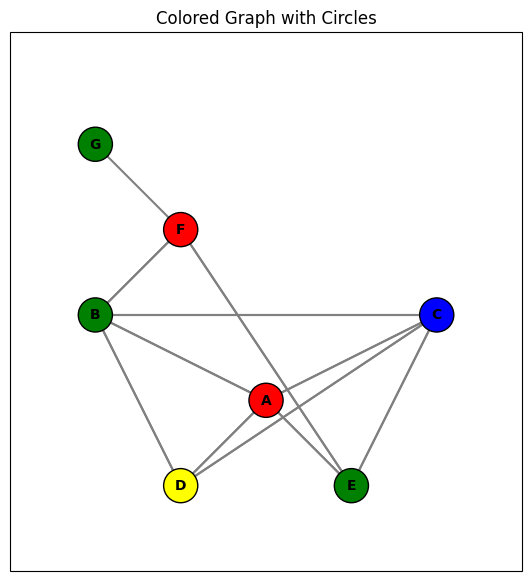

In [67]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Graph structure
graph = {
    'A': ['B', 'D', 'E', 'C'],
    'B': ['F', 'A', 'D', 'C'],
    'C': ['B', 'D', 'A', 'E'],
    'D': ['B', 'A', 'C'],
    'E': ['A', 'C', 'F'],
    'F': ['B', 'E'],
    'G': ['F']
}

# Node positions
positions = {
    'A': (30, 20),
    'B': (10, 30),
    'C': (50, 30),
    'D': (20, 10),
    'E': (40, 10),
    'F': (20, 40),
    'G': (10, 50)
}

# Color settings
colors = ['R', 'G', 'B', 'Y']
color_map = {'R': 'red', 'G': 'green', 'B': 'blue', 'Y': 'yellow'}

# Graph coloring
def is_valid(node, col, assignment):
    return all(assignment.get(nei) != col for nei in graph[node])

def color_graph():
    assignment = {}

    def backtrack(i):
        if i == len(graph): return True
        node = list(graph.keys())[i]
        for col in colors:
            if is_valid(node, col, assignment):
                assignment[node] = col
                if backtrack(i + 1): return True
                del assignment[node]
        return False

    return assignment if backtrack(0) else None

assignment = color_graph()

# Visualization
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_title("Colored Graph with Circles")
ax.set_extent((0, 60, 0, 60))

# Draw edges
for node, neighbors in graph.items():
    x1, y1 = positions[node]
    for neighbor in neighbors:
        x2, y2 = positions[neighbor]
        ax.plot([x1, x2], [y1, y2], color='gray', transform=ccrs.PlateCarree())

# Draw nodes as circles
for node, (x, y) in positions.items():
    circle = plt.Circle((x, y), radius=2, color=color_map[assignment[node]], ec='black', transform=ccrs.PlateCarree(), zorder=5)
    ax.add_patch(circle)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, weight='bold', transform=ccrs.PlateCarree(), zorder=6)

plt.show()
